## We generated the suitable mapper graph.
## The parameters were chosen from e_mappers 

In [1]:
library("Mapper")
library("igraph")
library("RcppCNPy")
library("stringr")
library("grid")
library("matlab")
require("plotrix") 
source("functions-R.R") #Functions
library("lattice")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘matlab’


The following object is masked from ‘package:stats’:

    reshape


The following objects are masked from ‘package:utils’:

    find, fix


The following object is masked from ‘package:base’:

    sum


Loading required package: plotrix



In [2]:
#devtools::session_info()

─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 3.6.3 (2020-02-29)
 os       Ubuntu 20.04.1 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language es_CO:es                    
 collate  es_CO.UTF-8                 
 ctype    es_CO.UTF-8                 
 tz       America/Detroit             
 date     2021-08-19                  

─ Packages ───────────────────────────────────────────────────────────────────
 package     * version date       lib source                             
 assertthat    0.2.1   2019-03-21 [1] CRAN (R 3.6.3)                     
 backports     1.2.0   2020-11-02 [1] CRAN (R 3.6.3)                     
 base64enc     0.1-3   2015-07-28 [1] CRAN (R 3.6.3)                     
 callr         3.5.1   2020-10-13 [1] CRAN (R 3.6.3)                     
 cli           2.1.0   2020-10-12 [1] CRAN (R 3.6.3)                     
 codeto

## Colors

In [3]:
show_palette <- function(colors) {
  par(pin=c(6,1),mai=c(.5,.5,.5,.5))
  image(1:n, 1, as.matrix(1:n), col = colors, 
    xlab = "", ylab = "", xaxt = "n", 
    yaxt = "n", bty = "n")
}

In [4]:
n<-176
#show_palette(jet.colors(n))
colors1=list(jet.colors(n)) #color for suspense

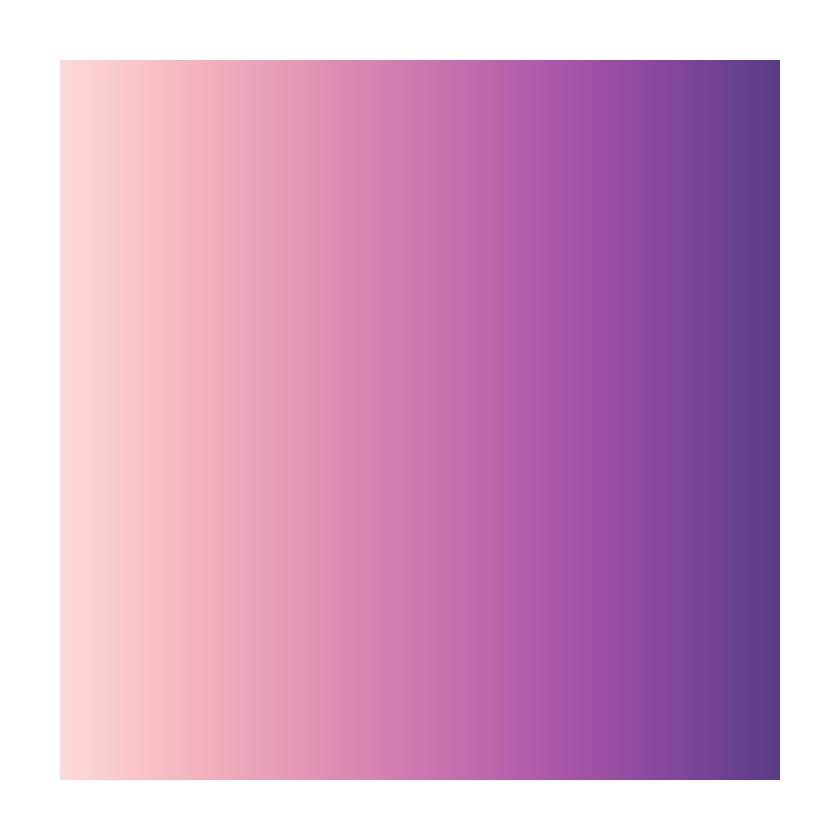

In [5]:
u <- 25
show_palette(hcl.colors(n, palette = "PurpOr")[rev(1:n)])
colors2=list(hcl.colors(n, palette = "PurpOr")[rev(1:n)]) #color for time
# show_palette(hcl.colors(n+u, palette = "purples")[rev(1:n)])
# colors2=list(hcl.colors(n+u, palette = "purples")[rev(1:n)])

[1] 176

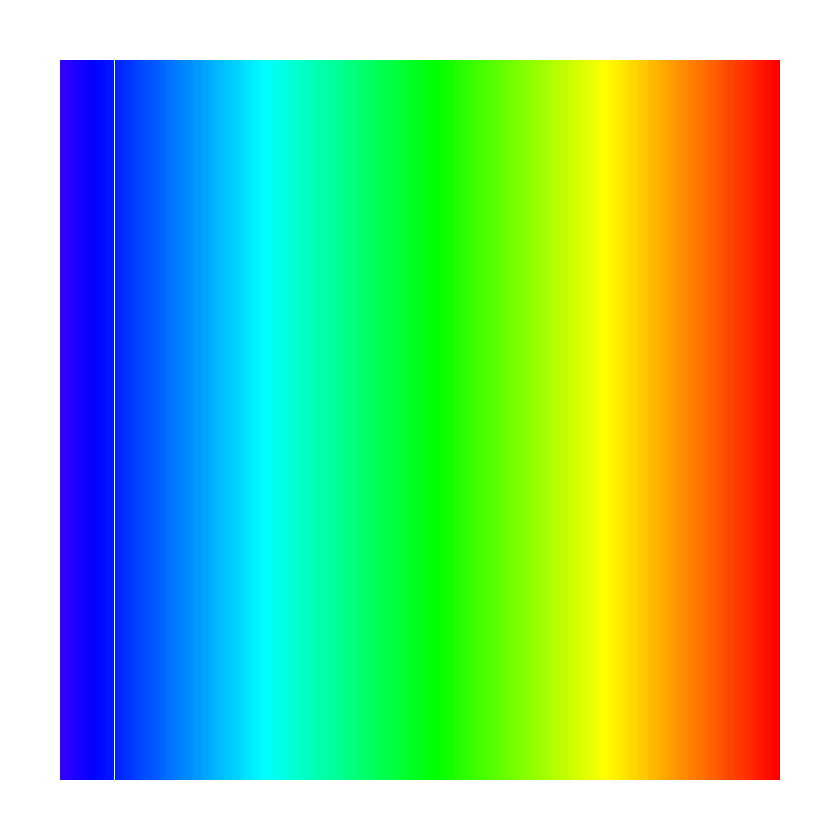

In [7]:
n <- 251
u <- 76
show_palette(rainbow(n)[rev(1:(n+1-u))])
length(1:(n+1-u))
colors1=list(rainbow(n)[rev(1:(n+1-u))])

In [8]:
colors=list(colors2,colors1)

In [9]:
#Suspense data
suspense=npyLoad("../Data/avg_suspense.npy")
length(suspense)

[1] 193

## Filters

In [10]:
filters=Sys.glob("../Data/filts/*.npy")
filters
filters[[6]]

[1] "../Data/filts/all_l1_iso_rand.npy"    
[2] "../Data/filts/all_l1-nothres_cmds.npy"
[3] "../Data/filts/all_l1-nothres_iso.npy" 
[4] "../Data/filts/all_l1-nothres_se.npy"  
[5] "../Data/filts/all_l1-thres_cmds.npy"  
[6] "../Data/filts/all_l1-thres_iso.npy"   
[7] "../Data/filts/all_l1-thres_se.npy"

[1] "../Data/filts/all_l1-thres_iso.npy"

## Filt with threshold

[1] 176   2

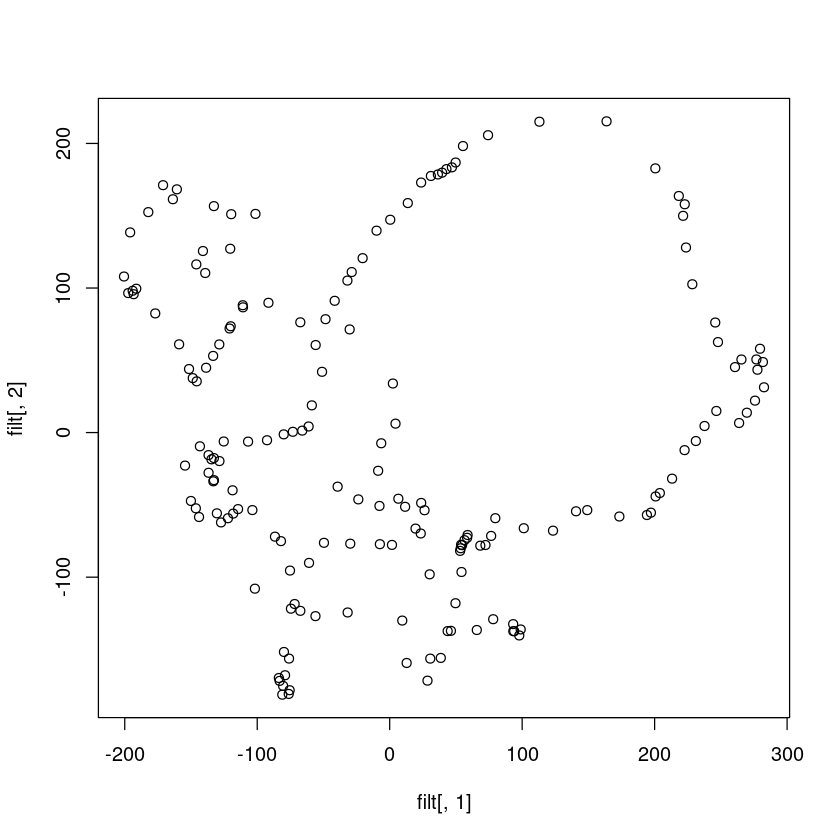

In [154]:
options(repr.plot.width=7, repr.plot.height=7)
filt=npyLoad(filters[[6]])
dim(filt)
plot(filt[,1],filt[,2])

In [155]:
file=filters[[6]]
mynames=my_names(file)
filter=npyLoad(file)
diss=npyLoad(mynames[["dist_file"]]) #Distance matrix
int=6 #Chosen 
ov=35 #Chosen
#Mapper construction
m = MapperRef$new(dist_x=diss)$
                use_filter(filter=filter)$
                use_cover(number_intervals = int,percent_overlap = ov)$
                use_clustering_algorithm(cl = "single" , 
                                 cutoff_method = "continuous" ,adjust=1.2,min_dist=65)$
                construct_k_skeleton(k = 1L)

In [156]:
length(m$vertices)

[1] 52

In [157]:
m

Mapper construction with (52, 100) (0, 1)-simplices
Fixed Interval Cover: (number intervals = [6, 6], percent overlap = [35, 35]%)

In [158]:
x = c(1,0)
y = c(0,1)

#Position of nodes in plot of graph
my_layout=layout_with_kk(m$as_igraph())


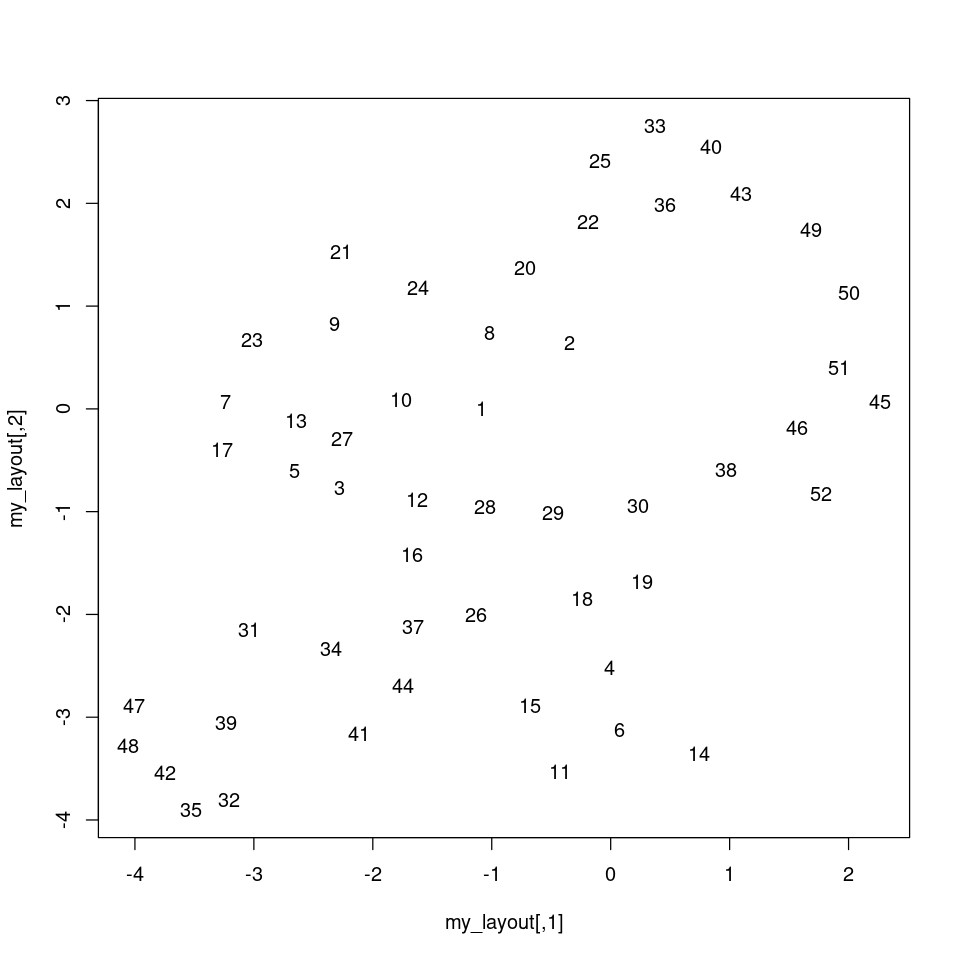

In [159]:
x = c(1,0)
y = c(0,1)

options(repr.plot.width=8, repr.plot.height=8)

my_layout=layout_with_kk(m$as_igraph())

#------------------------- Little moves of nodes for better visualization -----------------
my_layout[33,]=my_layout[33,]+ -0.5*x
my_layout[52,]=my_layout[52,]+ 0.6*x+0.4*y
my_layout[2,]=my_layout[2,]+ -y
my_layout[1,]=my_layout[1,]+ 0.3*x
my_layout[24,]=my_layout[24,] - 0.5*y
my_layout[21,]=my_layout[21,] - 0.2*y - 0.5*x
my_layout[23,]=my_layout[23,]+ 0.5*y
for (i in c(9,10,24,9,21,27,23,13,5,3,7,17)){
    my_layout[i,]=my_layout[i,]+ 0.2*y
}
for (i in c(9,24,21,23)){
    my_layout[i,]=my_layout[i,] -0.3*x + 0.2*y 
}
for (i in c(27,3,13,5,7,17)){
    my_layout[i,]=my_layout[i,] + 0.2*x + 0.1*y
}
for (i in c(3,5)){
    my_layout[i,]=my_layout[i,]+ 0.2*x
}
#=========================================================================================
my_layout[c(31,32,34,35,37,39,41,42,44,47,48),]= rotate(my_layout[c(31,32,34,35,37,39,41,42,44,47,48),],my_layout[37,],pi/2)
for (i in c(31,32,34,35,37,39,41,42,44,47,48)){
    my_layout[i,]=my_layout[i,] + 1.6*y+0.2*x
}
for (i in c(32,35,42,47,48)){
    my_layout[i,]=my_layout[i,] + 0.5*y + 0.2*x
}

my_layout[31,]=my_layout[31,] + 0.2*y - 0.3*x
my_layout[39,]=my_layout[39,] + 0.4*y + 0.1*x
my_layout[41,]=my_layout[41,]+ 0.5*x - 0.1*y

my_layout[26,]=my_layout[26,]+ 0.6*y + 0.9*x

my_layout[c(4,6,11,14,15),]= rotate(my_layout[c(4,6,11,14,15),],my_layout[15,],-2*pi/3)
for (i in c(4,6,11,14,15)){
    my_layout[i,]=my_layout[i,] -.5*y + 1.1*x
}
my_layout[4,]=my_layout[4,]- 0.25*x - 0.05*y
my_layout[11,]=my_layout[11,]+ 0.2*x +0.2*y

for (i in c(12,16)){
    my_layout[i,]=my_layout[i,]+ 0.3*x + 0.5*y
}
my_layout[16,]=my_layout[16,]+ 0.2*x +0.2*y

my_layout[18,]=my_layout[18,]+ 0.3*x -0.3*y

for (i in c(28,29)){
    my_layout[i,]=my_layout[i,]- 0.3*x + 0*y
}

my_layout[19,]=my_layout[19,]+ 0.3*x -0.2*y

angle <- pi/2
M <- matrix( c(cos(angle), -sin(angle), sin(angle), cos(angle)), 2, 2 ) #Rotation of graph
N <- matrix( c(-1, 0, 0, 1), 2, 2 ) # Reflection 
my_layout=my_layout %*% N
my_layout=my_layout %*% M
plot(my_layout,pch='')
for (i in 1:nrow(my_layout)){
   text(my_layout[i,1],my_layout[i,2],label=toString(i)) 
}

In [160]:
time_points=nrow(filter)
y=list()
for (i in 1:time_points){
    y[[i]]=mean(suspense[i:i+17])
}
y=unlist(y)

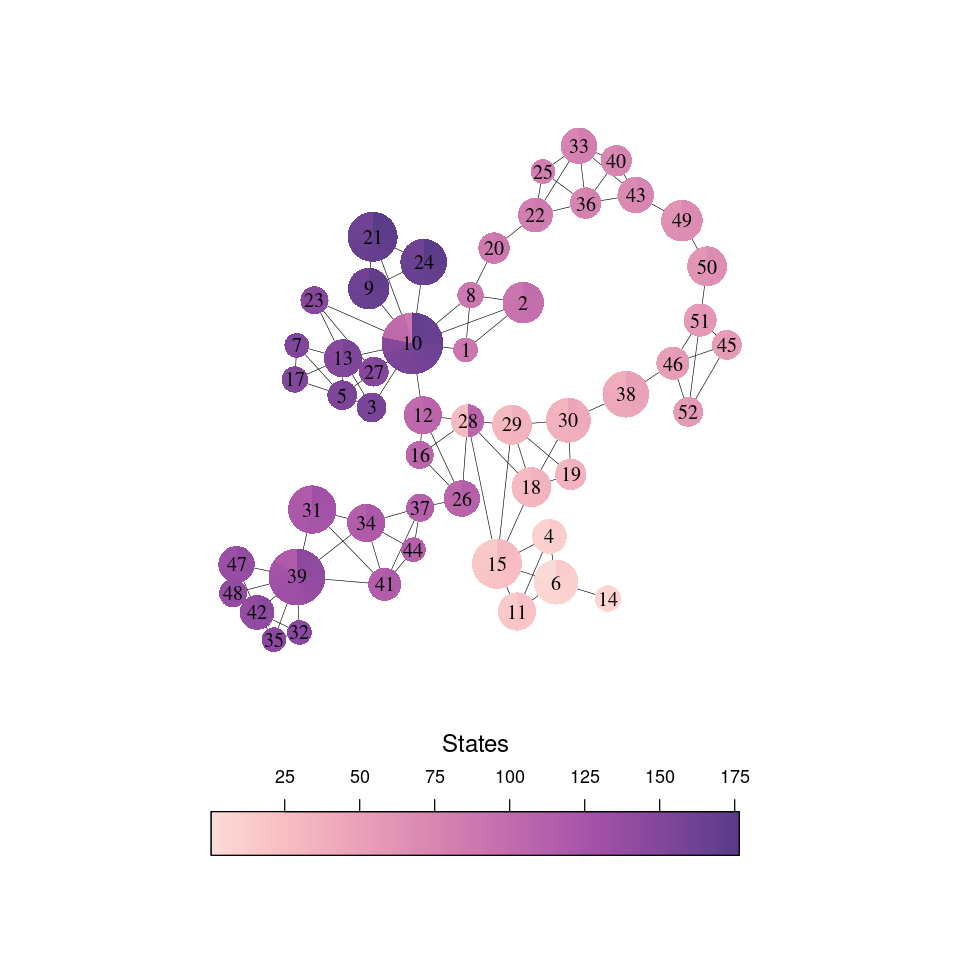

In [161]:
###### Time graph with numeration,horizontal colorbar
#pdf('../Imagenes/mapper_graphs/chosen_mapper_time.pdf',width=7,height=6.5) #horizontal
#png('../Imagenes/mapper_graphs/cuts.png',width = 1400, height = 1300, units = "px")
#options(repr.plot.width=10, repr.plot.height=9.5)
time_points=nrow(filter)
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
labels=lapply(1:length(m$vertices),toString)
params=my_plot_params(m,my_layout,my_make_pie1,colors2,labels=labels,margin=c(.2,0,.2,.2),pin=c(5,5)) #time
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)

layout(matrix(c(1,2),2,1),heights=c(4.5,1),widths=c(4))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.55,col=col,pos=c(.6,.22),
          title="States",title.cex=1.2,horizontal=TRUE)

#dev.off()

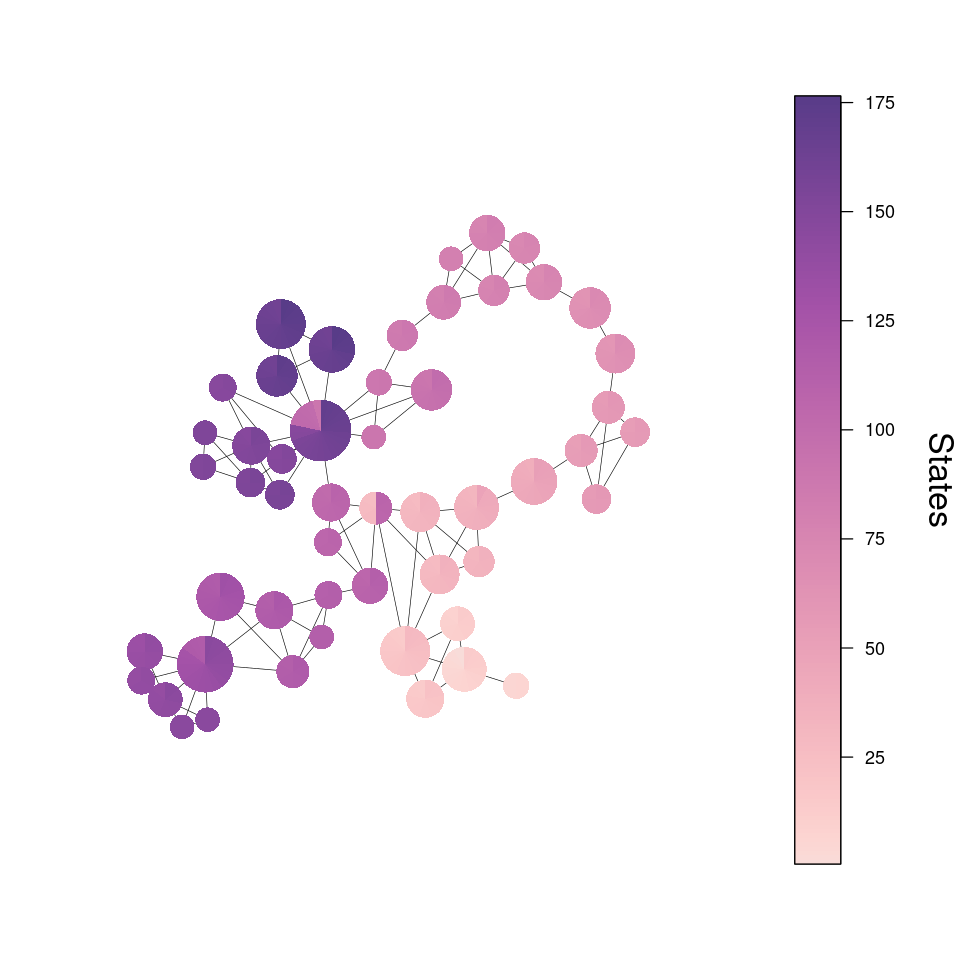

In [162]:
###### Time graph without numeration, vertical colorbar
#png('../Imagenes/mapper_graphs/chosen_mapper_time.png',width = 1400, height = 1300, units = "px")
#pdf('../Imagenes/mapper_graphs/chosen_mapper_time2.pdf',width=7,height=6.5) #vertical
#options(repr.plot.width=10, repr.plot.height=9.5)
time_points=nrow(filter)
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
labels=lapply(1:length(m$vertices),toString)
params=my_plot_params(m,my_layout,my_make_pie1,colors2,margin=c(.2,0,.2,.2),pin=c(5,5)) #time
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)
layout(matrix(c(1,2),1,2),widths=c(5.5,1.3))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.8,col=col,title=NULL,
                title.side=NULL,title.line=NULL,horizontal=FALSE)

corners = par("usr") #Gets the four corners of plot area (x1, x2, y1, y2)
par(xpd = TRUE) #Draw outside plot area
text(x = corners[2]+2.2, y = mean(corners[3:4]),cex=1.7, "States", srt = 270)
#dev.off()

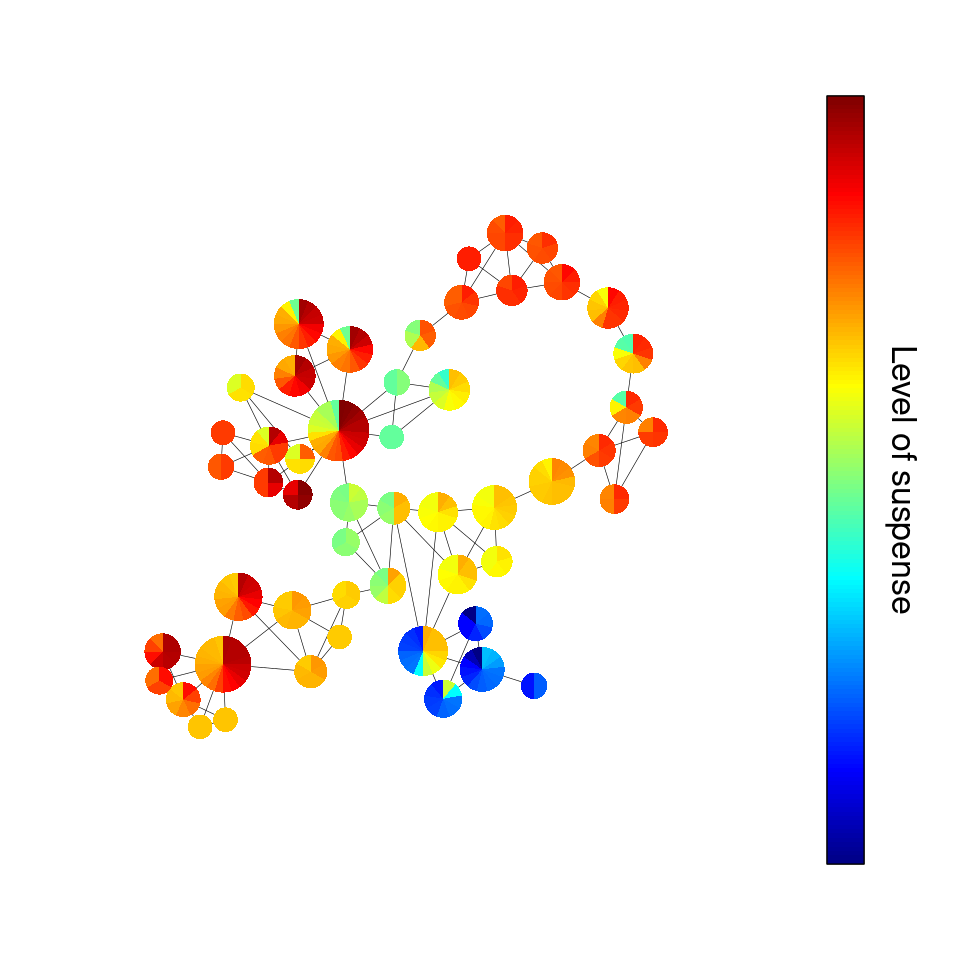

In [163]:
###### Suspense grapgh
#pdf('../Imagenes/mapper_graphs/chosen_mapper_suspense.pdf',width=6.5,height=6.5)
#options(repr.plot.width=1.5*5, repr.plot.height=1.5*3)
time_points=nrow(filter)
#f=make_image(suspense[11:186])
f=make_image(y)
my_make_pie2=make_pie_fun(f,m$vertices,time_points)

params=my_plot_params(m,my_layout,my_make_pie2,colors1,margin=c(.2,0,.2,.2),pin=c(5,5)) #level of suspense
fmax=round(max(suspense),2)
fmin=round(min(suspense),2)
col=na.omit(unlist(colors1))

layout(matrix(c(1,2),1,2),widths=c(5.5,1))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=NULL,width=.25,heigth=.8,col=col,title=NULL,
            title.side=NULL,title.line=NULL,horizontal=FALSE)

corners = par("usr") #Gets the four corners of plot area (x1, x2, y1, y2)
par(xpd = TRUE) #Draw outside plot area
text(x = corners[2]+1, y = mean(corners[3:4]),cex=1.7, "Level of suspense", srt = 270)

#dev.off()

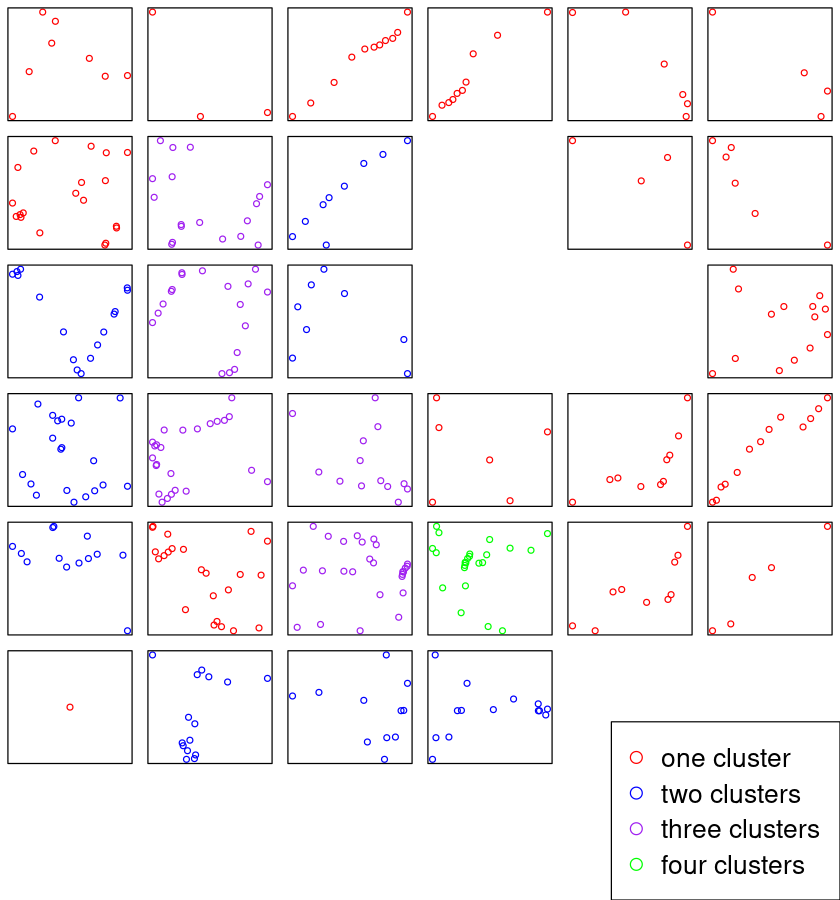

In [164]:
#Graph of how the cover is dividing datapoints in filter
cover=m$cover
options(repr.plot.width=7, repr.plot.height=7.5)
par(mar = rep(.5, 4))
layout(rbind(matrix(1:(int*int),ncol=int,byrow=TRUE),rep(int*int+1,int)))
for (i in seq(int-1,0,-1)){
    for (j in 1:int){
    a=cover$level_sets[[int*i+j]]
    l=length(m$pullback[[int*i+j]])
    if (l== 1){col='red'}
    else if (l == 2){col='blue'}
    else if (l == 3){col='purple'}
    else {col='green'}
    if (length(a) == 0){plot.new()}
    else{plot(filter[a,1],filter[a,2],xaxt='n',yaxt='n',pch=1,col=col)}
    }
}
par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
   plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend("bottomright",legend=c("one cluster","two clusters","three clusters","four clusters"),
       col=c("red","blue","purple","green"),pch=1,cex=2,bg="white")

In [165]:
#indices (data points in the open cover (4,3) 4 horizontal, 3 vertical)
indices=m$cover$level_sets$'(4 3)'
length(indices)
indices
new_D=diss[indices,indices]

[1] 6

[1]  26  27  29 106 107 108
attr(,"bounds")
[1]  19.32199 -66.88113 143.20326  34.80540

[1] 126.0632

[1] 1 1 1 1 1 1

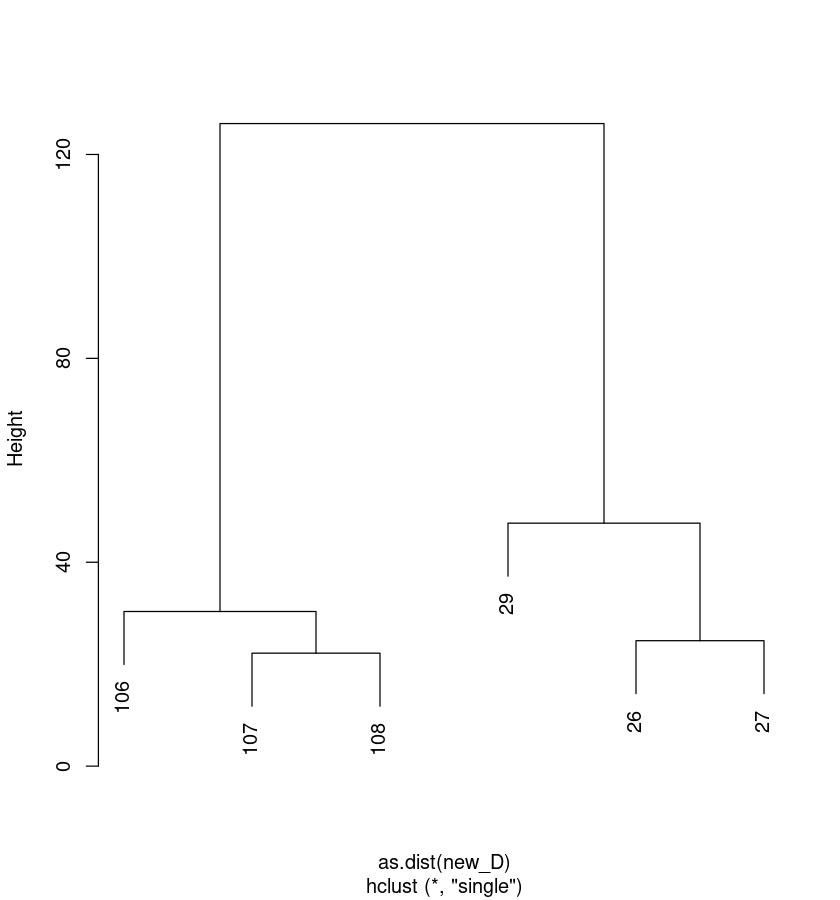

In [166]:
#clustering of the open cover (4,3)
min_dist=65
hcl=hclust(as.dist(new_D),method='single')
eps=cutoff_first_threshold(hcl,adjust=1,min_dist=10)
eps
cutree(hcl, h = eps)
#pdf('../Imagenes/thesis/node_28.pdf',width=4.5,height=5)
plot(hcl,labels=indices,main="",axes=FALSE)
axis(2, at=c(0,40,80,120))
#dev.off()

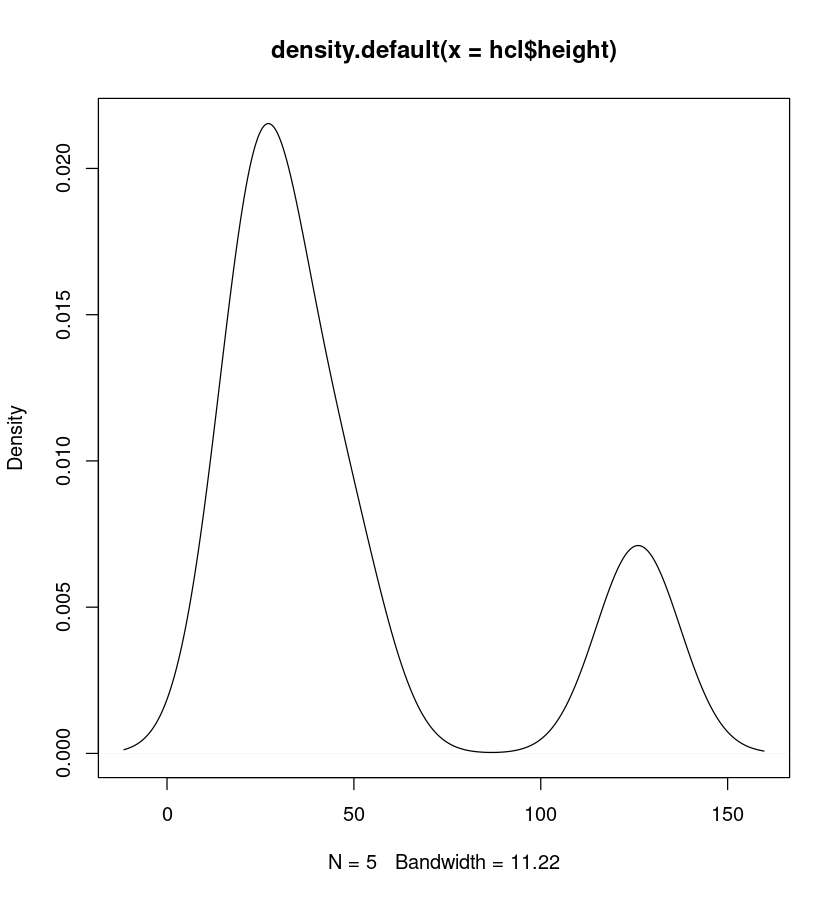

In [167]:
#density of heights of clustering
den=density(hcl$height)
plot(den)

## Mapper with no thresholded data

In [13]:
filters[[3]]

[1] "../Data/filts/all_l1-nothres_iso.npy"

[1] 176   2

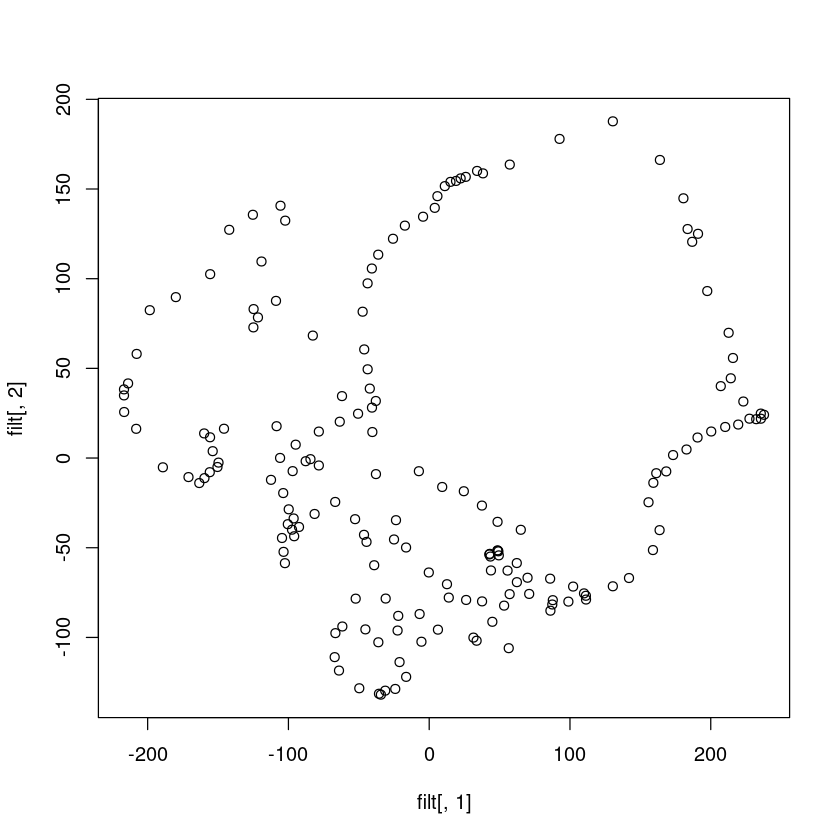

In [14]:
options(repr.plot.width=7, repr.plot.height=7)
filt=npyLoad(filters[[3]])
dim(filt)
plot(filt[,1],filt[,2])

In [15]:
file=filters[[3]]
mynames=my_names(file)
filter=npyLoad(file)
diss=npyLoad(mynames[["dist_file"]]) #Distance matrix
int=6
ov=35
m = MapperRef$new(dist_x=diss)$
                use_filter(filter=filter)$
                use_cover(number_intervals = int,percent_overlap = ov)$
                use_clustering_algorithm(cl = "single" , 
                                 cutoff_method = "continuous" ,adjust=0.9,min_dist=65)$
                construct_k_skeleton(k = 1L)

In [16]:
length(m$vertices)

[1] 46

In [17]:
m

Mapper construction with (46, 104) (0, 1)-simplices
Fixed Interval Cover: (number intervals = [6, 6], percent overlap = [35, 35]%)

In [18]:
my_layout=layout_with_kk(m$as_igraph())

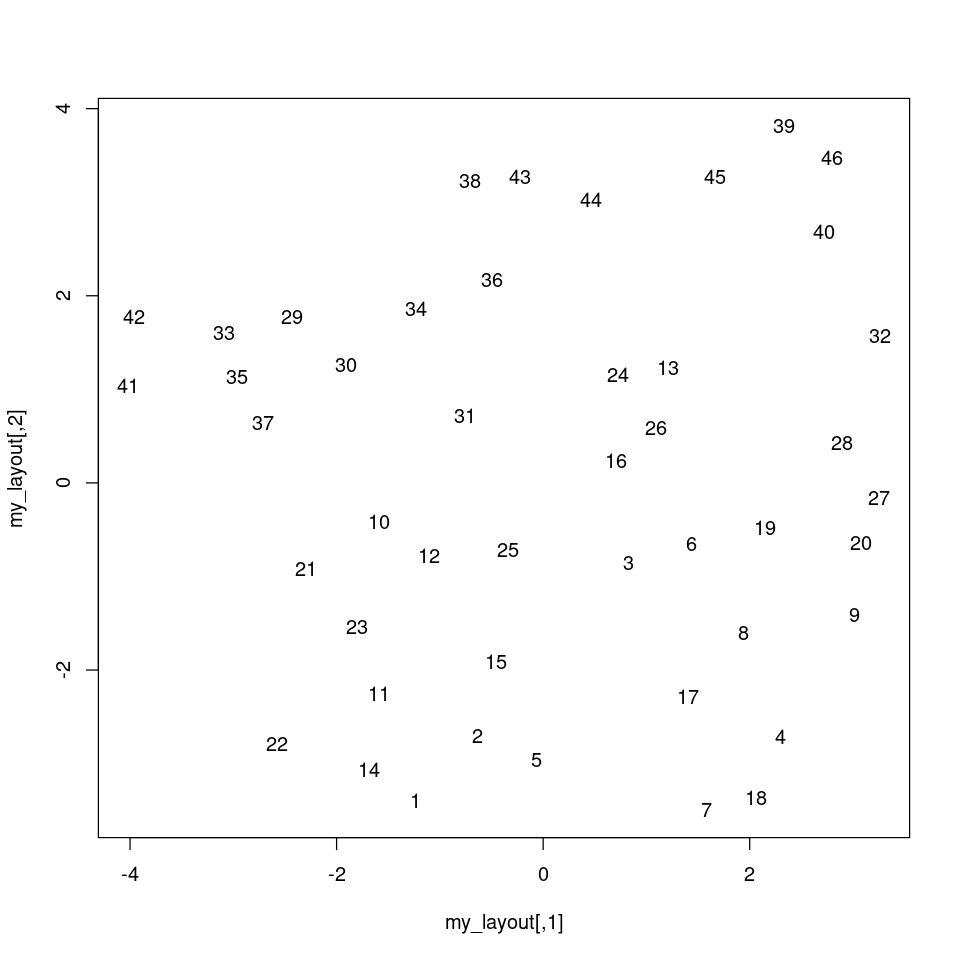

In [19]:
x = c(1,0)
y = c(0,1)

options(repr.plot.width=8, repr.plot.height=8)

my_layout=layout_with_kk(m$as_igraph())

for (i in c(4,7,17,18)){
    my_layout[i,]=my_layout[i,] + 1*y-1*x
}

my_layout[8,]=my_layout[8,]+ -0.1*x + 0.6*y

for (i in c(3,6,13,16,24,26)){
    my_layout[i,]=my_layout[i,] -0.8*y+0.1*x
}
# my_layout[c(3,6,13,16,24,26),]= rotate(my_layout[c(3,6,13,16,24,26),],my_layout[17,],pi/6)

for (i in c(1,2,5,11,14,15)){
    my_layout[i,]=my_layout[i,]+y
}

for (i in c(21,22,23,10,12)){
    my_layout[i,]=my_layout[i,] + 3*y+0.5*x
}

for (i in c(29,30,33,35,37,41,42)){
    my_layout[i,]=my_layout[i,] + 0*y+1*x
}


my_layout[25,]=my_layout[25,]+ 0.8*y + 0.*x
# #=========================================================================================

angle <- 7*pi/8
M <- matrix( c(cos(angle), -sin(angle), sin(angle), cos(angle)), 2, 2 ) #Rotation
#N <- matrix( c(-1, 0, 0, 1), 2, 2 ) #Flip
#my_layout=my_layout %*% N
my_layout=my_layout %*% M
plot(my_layout,pch='')
for (i in 1:nrow(my_layout)){
   text(my_layout[i,1],my_layout[i,2],label=toString(i)) 
}

In [20]:
time_points=nrow(filter)
y=list()
for (i in 1:time_points){
    y[[i]]=mean(suspense[i:i+17])
}
y=unlist(y)

In [21]:
my_names(file)

$part
[1] "all"

$metric
[1] "l1-nothres"

$filter
[1] "iso"

$dist_file
[1] "../Data/dist/all_l1-nothres.npy"

$file
[1] "../Data/mapper/all_l1-nothres_iso.rds"

$pdf
[1] "../Imagenes/mapper_graphs/mapper_all_l1-nothres_iso.pdf"

$title
[1] "Mapper for part =  all , metric= l1-nothres , filter = iso"

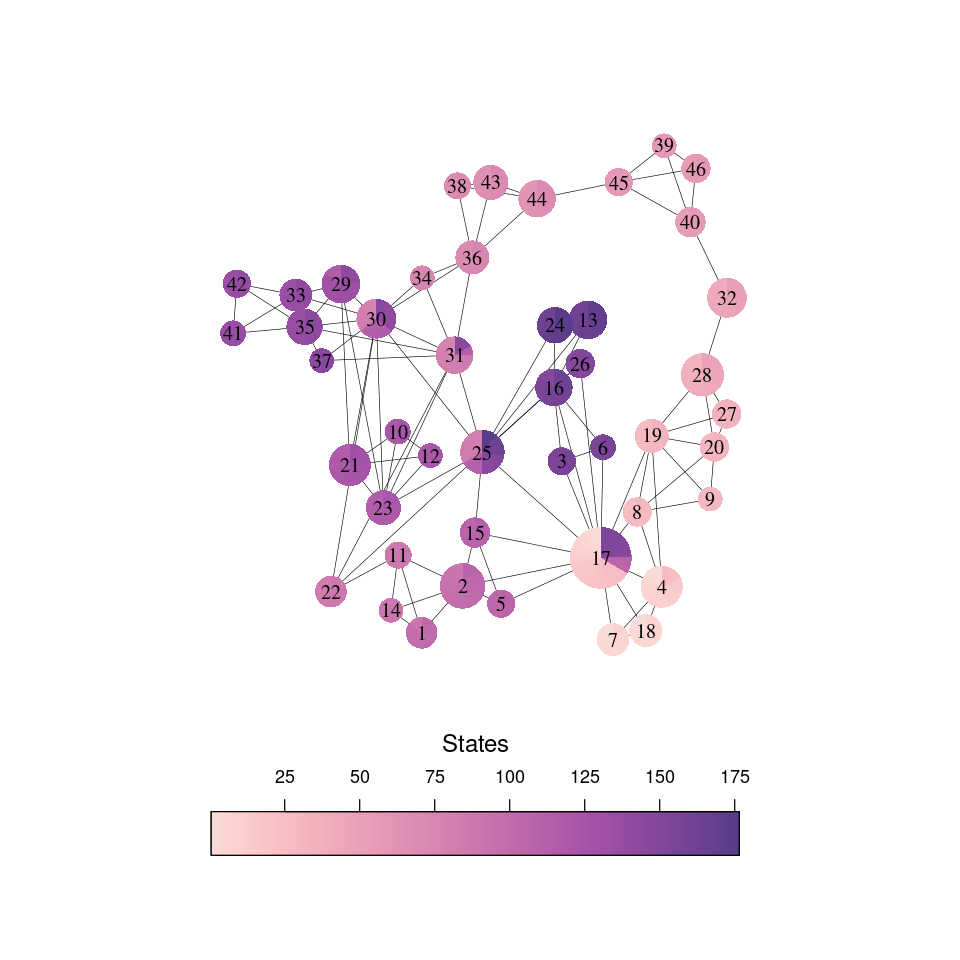

In [22]:
###### Time
#pdf('../Imagenes/mapper_graphs/mapper_nothres_time.pdf',width=7,height=6.5) #horizontal
#png('../Imagenes/mapper_graphs/chosen_mapper_time.png',width = 1400, height = 1300, units = "px")
#options(repr.plot.width=10, repr.plot.height=9.5)
time_points=nrow(filter)
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
labels=lapply(1:length(m$vertices),toString)
params=my_plot_params(m,my_layout,my_make_pie1,colors2,labels=labels,margin=c(.2,0,.2,.2),pin=c(5,5)) #time
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)

layout(matrix(c(1,2),2,1),heights=c(4.5,1),widths=c(4))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.55,col=col,pos=c(.6,.22),
          title="States",title.cex=1.2,horizontal=TRUE)

#dev.off()

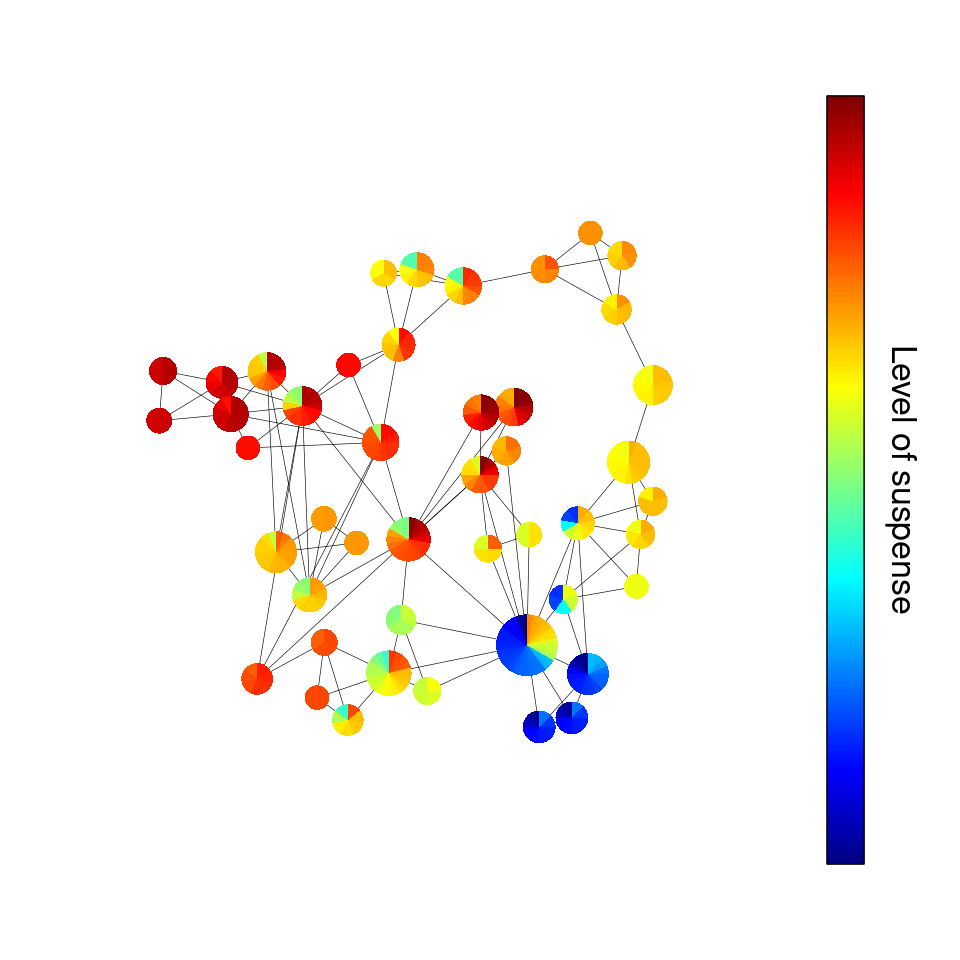

In [23]:
###### Suspense
#pdf('../Imagenes/mapper_graphs/mapper_nothres_suspense.pdf',width=6.5,height=6.5)
#options(repr.plot.width=1.5*5, repr.plot.height=1.5*3)
time_points=nrow(filter)
f=make_image(suspense[11:186])
#f=make_image(y)
my_make_pie2=make_pie_fun(f,m$vertices,time_points)

params=my_plot_params(m,my_layout,my_make_pie2,colors1,margin=c(.2,0,.2,.2),pin=c(5,5)) #level of suspense
fmax=round(max(suspense),2)
fmin=round(min(suspense),2)
col=na.omit(unlist(colors1))

layout(matrix(c(1,2),1,2),widths=c(5.5,1))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=NULL,width=.25,heigth=.8,col=col,title=NULL,
            title.side=NULL,title.line=NULL,horizontal=FALSE)

corners = par("usr") #Gets the four corners of plot area (x1, x2, y1, y2)
par(xpd = TRUE) #Draw outside plot area
text(x = corners[2]+1, y = mean(corners[3:4]),cex=1.7, "Level of suspense", srt = 270)

#dev.off()

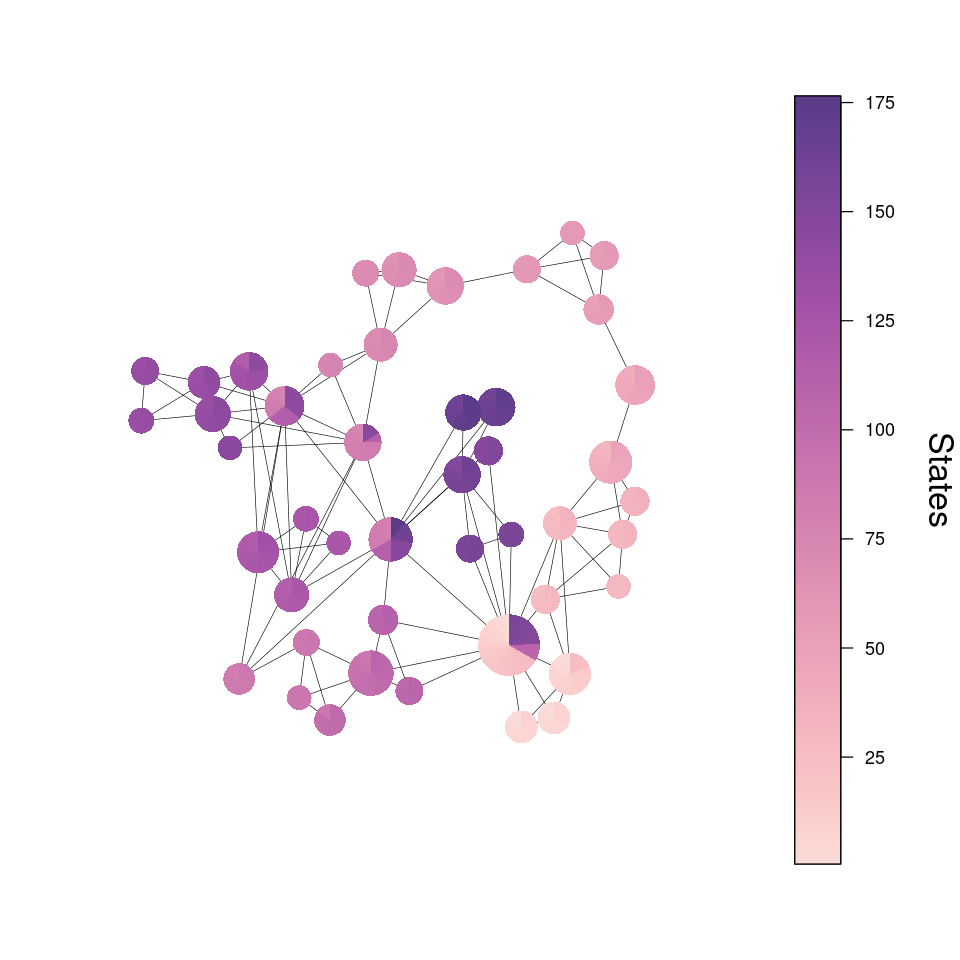

In [24]:
###### Time
#pdf('../Imagenes/mapper_graphs/mapper_nothres_time.pdf',width=6.5,height=6.5)
#options(repr.plot.width=10, repr.plot.height=9.5)
time_points=nrow(filter)
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
#labels=lapply(1:length(m$vertices),toString)
params=my_plot_params(m,my_layout,my_make_pie1,colors2,margin=c(.2,0,.2,.2),pin=c(5,5)) #time
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)
layout(matrix(c(1,2),1,2),widths=c(5.5,1.3))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.8,col=col,title=NULL,
                title.side=NULL,title.line=NULL,horizontal=FALSE)

corners = par("usr") #Gets the four corners of plot area (x1, x2, y1, y2)
par(xpd = TRUE) #Draw outside plot area
text(x = corners[2]+2.2, y = mean(corners[3:4]),cex=1.7, "States", srt = 270)
#dev.off()

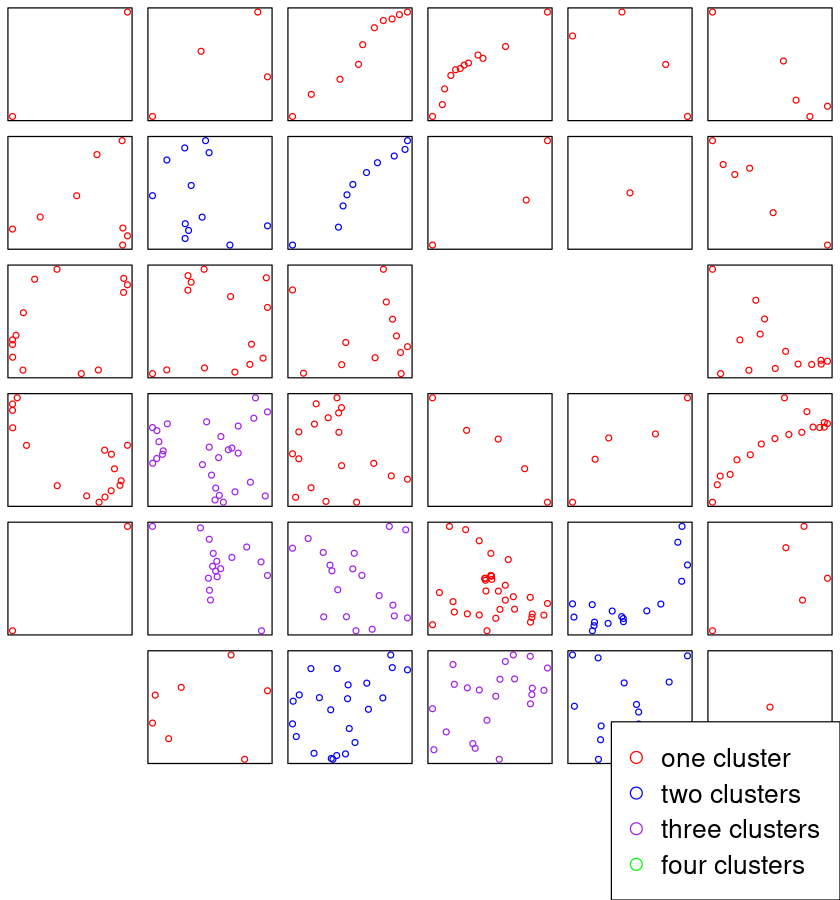

In [25]:
cover=m$cover
options(repr.plot.width=7, repr.plot.height=7.5)
par(mar = rep(.5, 4))
layout(rbind(matrix(1:(int*int),ncol=int,byrow=TRUE),rep(int*int+1,int)))
for (i in seq(int-1,0,-1)){
    for (j in 1:int){
    a=cover$level_sets[[int*i+j]]
    l=length(m$pullback[[int*i+j]])
    if (l== 1){col='red'}
    else if (l == 2){col='blue'}
    else if (l == 3){col='purple'}
    else {col='green'}
    if (length(a) == 0){plot.new()}
    else{plot(filter[a,1],filter[a,2],xaxt='n',yaxt='n',pch=1,col=col)}
    }
}
par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
   plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend("bottomright",legend=c("one cluster","two clusters","three clusters","four clusters"),
       col=c("red","blue","purple","green"),pch=1,cex=2,bg="white")

In [26]:
indices=m$cover$level_sets$'(4 2)'
length(indices)
indices
new_D=diss[indices,indices]

[1] 33

[1]   1   2   3   6   7   8   9  10  12  15  16  17  18  19  20  21  22  23  24
[20]  25  26  27 107 108 109 148 149 150 151 152 153 154 155
attr(,"bounds")
[1]  -9.887115 -92.987464 106.682053 -11.025980

[1] 110.647

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

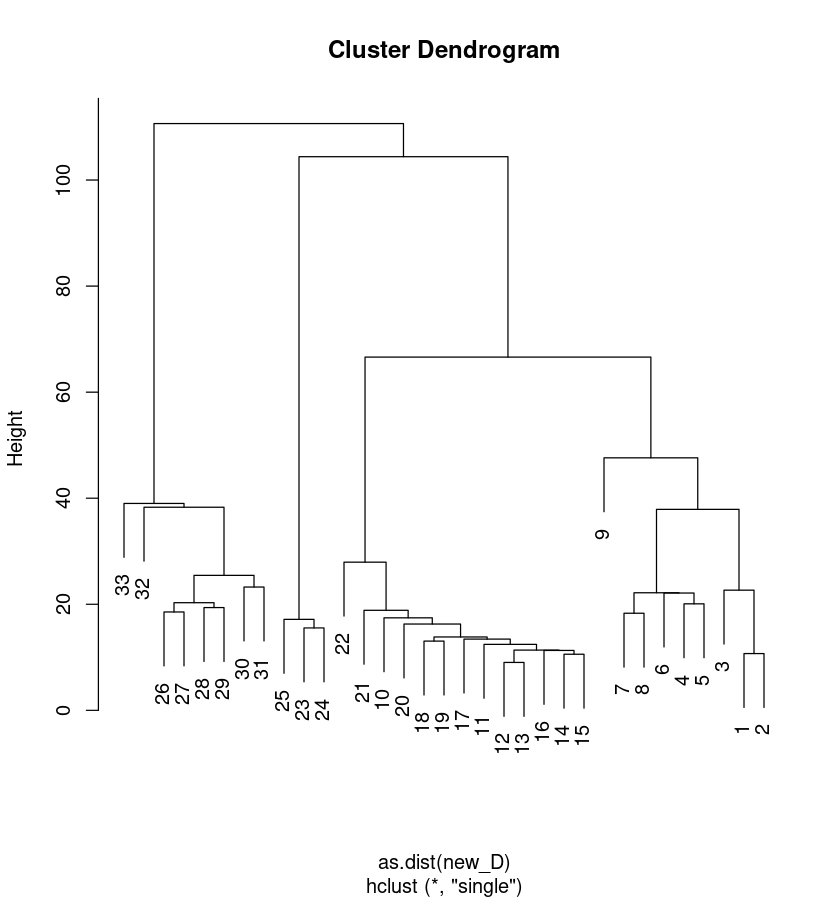

In [27]:
min_dist=65
hcl=hclust(as.dist(new_D),method='single')
eps=cutoff_first_threshold(hcl,adjust=1,min_dist=65)
eps
cutree(hcl, h = eps)
plot(hcl)

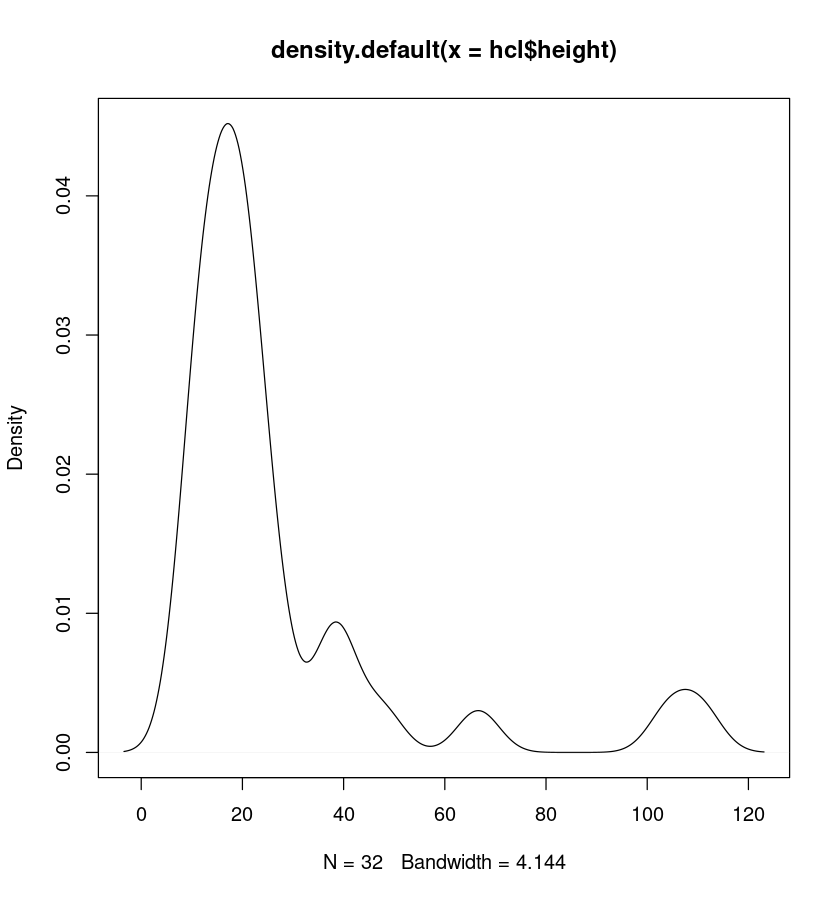

In [28]:
den=density(hcl$height)
plot(den)

In [37]:
filt=read.csv('../Data/filts/all_l1_iso_rand.csv',header = FALSE)
filt=as.matrix(filt)

## Mapper with random data (from bootstrap)

In [36]:
filters[[1]]

[1] "../Data/filts/all_l1_iso_rand.npy"

[1] 176   2

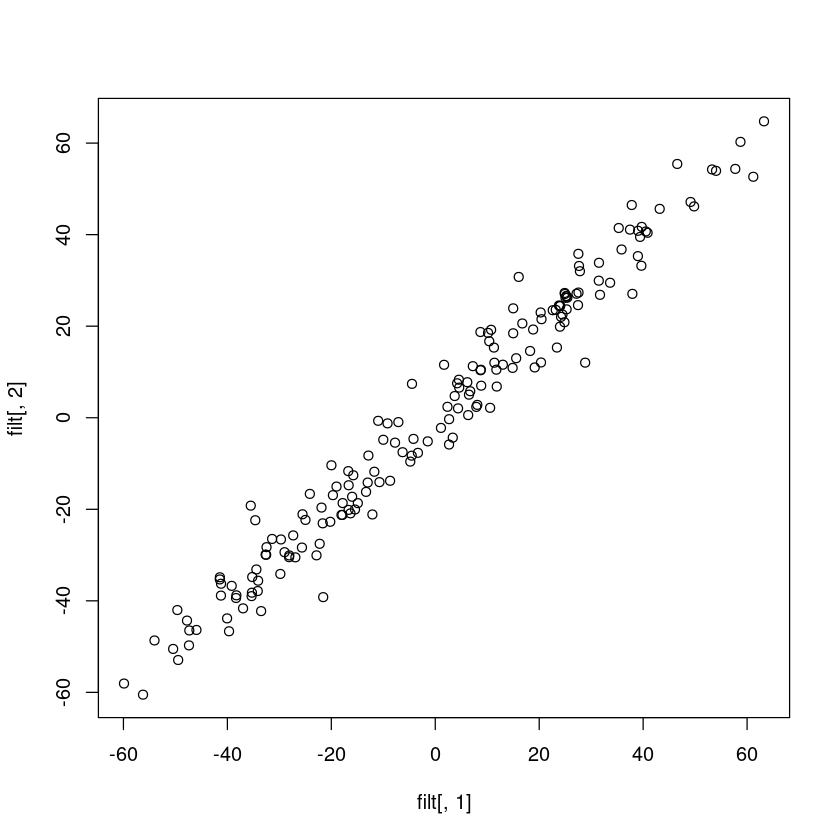

In [29]:
options(repr.plot.width=7, repr.plot.height=7)
filt=npyLoad(filters[[1]])
dim(filt)
plot(filt[,1],filt[,2])

In [30]:
filter=filt
diss=npyLoad('../Data/dist/all_l1_rand.npy') #Distance matrix
int=6
ov=35
m = MapperRef$new(dist_x=diss)$
                use_filter(filter=filter)$
                use_cover(number_intervals = int,percent_overlap = ov)$
                use_clustering_algorithm(cl = "single" , 
                                 cutoff_method = "continuous" ,adjust=1,min_dist=40)$
                construct_k_skeleton(k = 1L)

In [31]:
length(m$vertices)

[1] 19

In [32]:
m

Mapper construction with (19, 42) (0, 1)-simplices
Fixed Interval Cover: (number intervals = [6, 6], percent overlap = [35, 35]%)

In [33]:
x = c(1,0)
y = c(0,1)

my_layout=layout_with_kk(m$as_igraph())

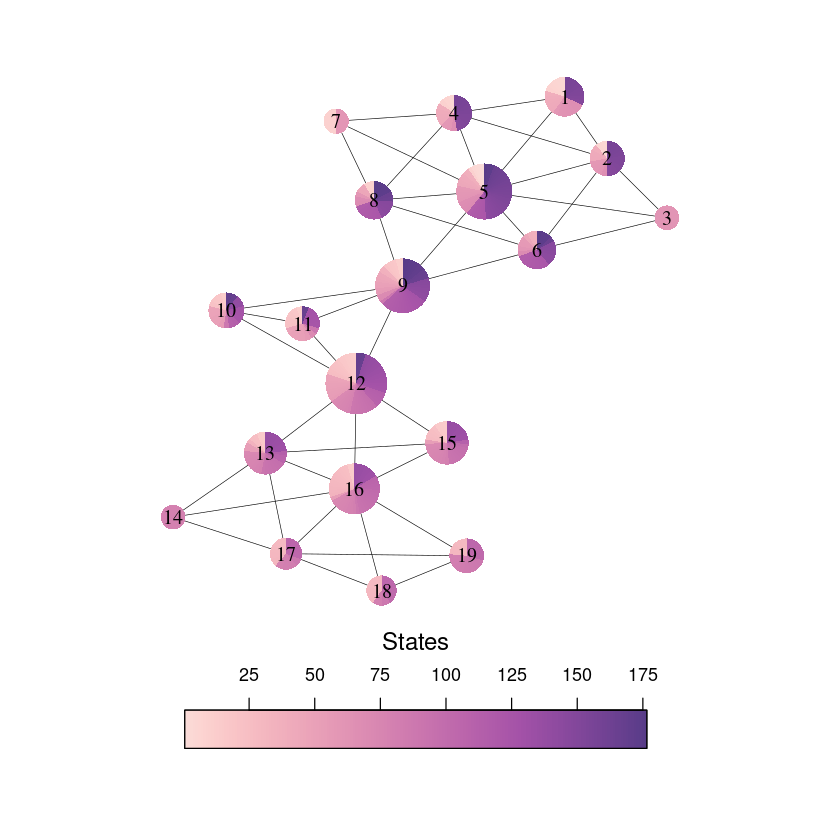

In [34]:
###### Time
#pdf('../Imagenes/mapper_graphs/chosen_mapper_time.pdf',width=7,height=6.5) #horizontal
#png('../Imagenes/mapper_graphs/cuts.png',width = 1400, height = 1300, units = "px")
#options(repr.plot.width=10, repr.plot.height=9.5)
time_points=nrow(filter)
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
labels=lapply(1:length(m$vertices),toString)
params=my_plot_params(m,my_layout,my_make_pie1,colors2,labels=labels,margin=c(.2,0,.2,.2),pin=c(5,5)) #time
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)

layout(matrix(c(1,2),2,1),heights=c(4.5,1),widths=c(4))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.55,col=col,pos=c(.6,.22),
          title="States",title.cex=1.2,horizontal=TRUE)

#dev.off()